<a href="https://colab.research.google.com/github/BoojiBooji/mocha-ai-project/blob/main/Copy_of_Copy_of_Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Shorten the dataset to 40,000 rows

This code snippet will load the dataset (assuming it's a CSV file) into a pandas DataFrame and then retain only the first 40,000 rows. This is useful for working with a smaller subset of a large dataset.

# Slicing (Rand)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
import kagglehub

path = kagglehub.dataset_download("waqi786/usa-rainfall-prediction-dataset-2024-2025")

import pandas as pd
import os

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

dataset_file = os.path.join(path, csv_files[0])
print(f"Found dataset file: {dataset_file}")

df = pd.read_csv(dataset_file)
df_short = df.head(40000)

print(f"Original DataFrame shape: {df.shape}")
print(f"Shortened DataFrame shape: {df_short.shape}")

display(df_short.head())

Using Colab cache for faster access to the 'usa-rainfall-prediction-dataset-2024-2025' dataset.
Found dataset file: /kaggle/input/usa-rainfall-prediction-dataset-2024-2025/usa_rain_prediction_dataset_2024_2025.csv
Original DataFrame shape: (73100, 9)
Shortened DataFrame shape: (40000, 9)


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [32]:
print(f"Shape of the shortened DataFrame (df_short): {df_short.shape}")
display(df_short.head())

Shape of the shortened DataFrame (df_short): (40000, 9)


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


# Clean - EDA (Deema)

In [33]:

print("Data Information:")
df_short.info()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           40000 non-null  object 
 1   Location       40000 non-null  object 
 2   Temperature    40000 non-null  float64
 3   Humidity       40000 non-null  float64
 4   Wind Speed     40000 non-null  float64
 5   Precipitation  40000 non-null  float64
 6   Cloud Cover    40000 non-null  float64
 7   Pressure       40000 non-null  float64
 8   Rain Tomorrow  40000 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 2.7+ MB


In [34]:

print("Descriptive Statistics:")
df_short.describe()

Descriptive Statistics:


,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,65.113327,59.886994,15.033186,0.388525,54.963417,1005.175214,0.220000
std,20.241113,23.091952,8.681150,0.474229,26.007645,20.213778,0.414251
min,30.000866,20.001711,0.000712,0.000000,10.000856,970.001774,0.000000
25%,47.575138,39.763211,7.474980,0.000000,32.287678,987.701473,0.000000
50%,65.084899,60.018010,15.134668,0.193086,54.975319,1005.263824,0.000000
75%,82.731491,79.861214,22.565275,0.668110,77.505098,1022.781066,0.000000
max,99.997393,99.999025,29.998622,3.078090,99.997299,1039.998725,1.000000


In [35]:

print("Missing Values per Column:")
missing_values = df_short.isnull().sum()
missing_percentage = (missing_values / len(df_short)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
missing_df[missing_df['Missing_Count'] > 0]

Missing Values per Column:


,Missing_Count,Percentage


In [36]:
numeric_columns = df_short.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if df_short[col].isnull().sum() > 0:
        df_short[col].fillna(df_short[col].median(), inplace=True)

df_short.dropna(inplace=True)
print(f"After cleaning - Number of rows: {df_short.shape[0]}")

After cleaning - Number of rows: 40000


/tmp/ipython-input-518937212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short.dropna(inplace=True)


In [37]:
duplicates = df_short.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df_short.drop_duplicates(inplace=True)
    print(f"After removing duplicates: {df_short.shape[0]}")

Number of duplicate rows: 0


In [38]:

print("Final Data Shape After Cleaning:")
print(f"Shape: {df_short.shape}")
df_short.head()

Final Data Shape After Cleaning:
Shape: (40000, 9)


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


<Figure size 1200x600 with 0 Axes>

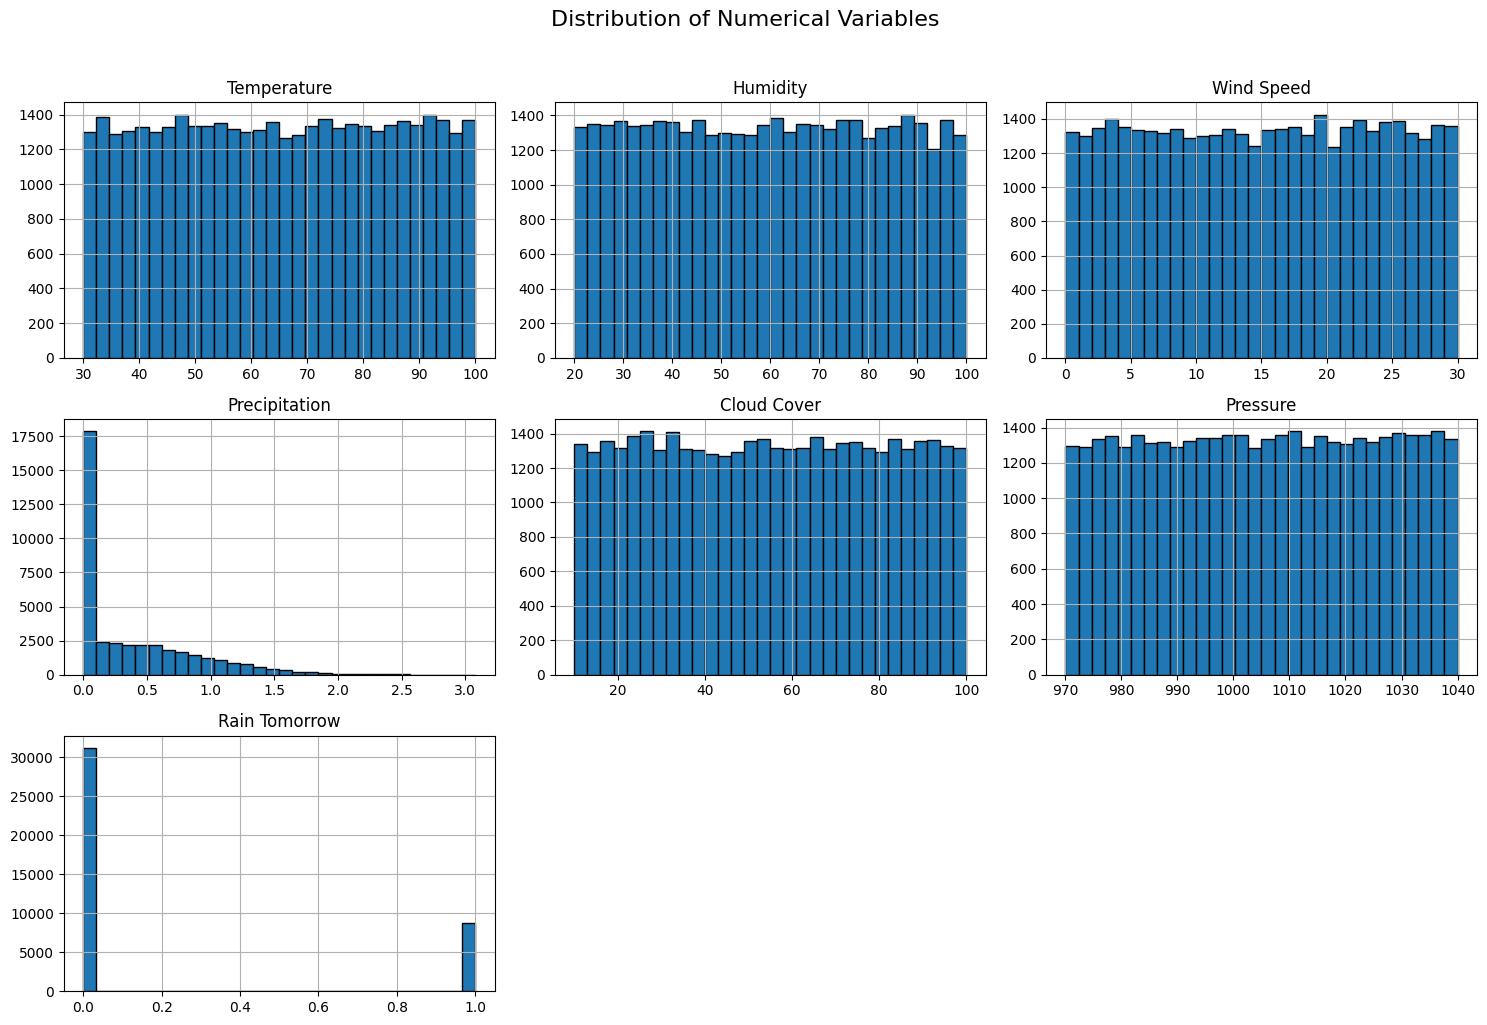

In [39]:
plt.figure(figsize=(12, 6))
df_short.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)
plt.tight_layout()
plt.show();

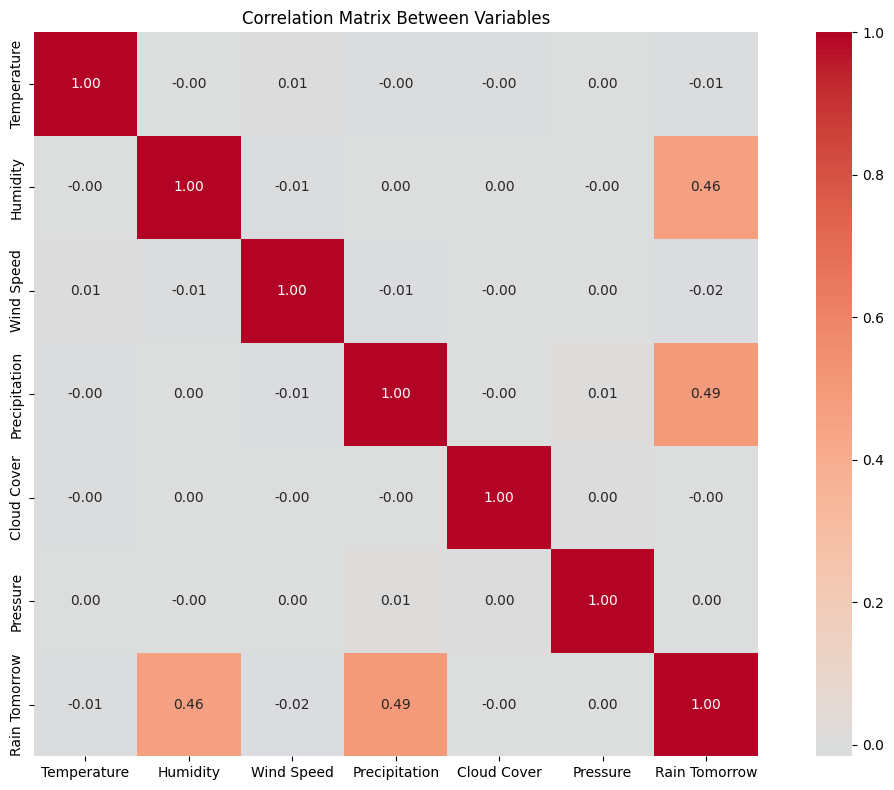

In [40]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_short.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix Between Variables')
plt.tight_layout()
plt.show()

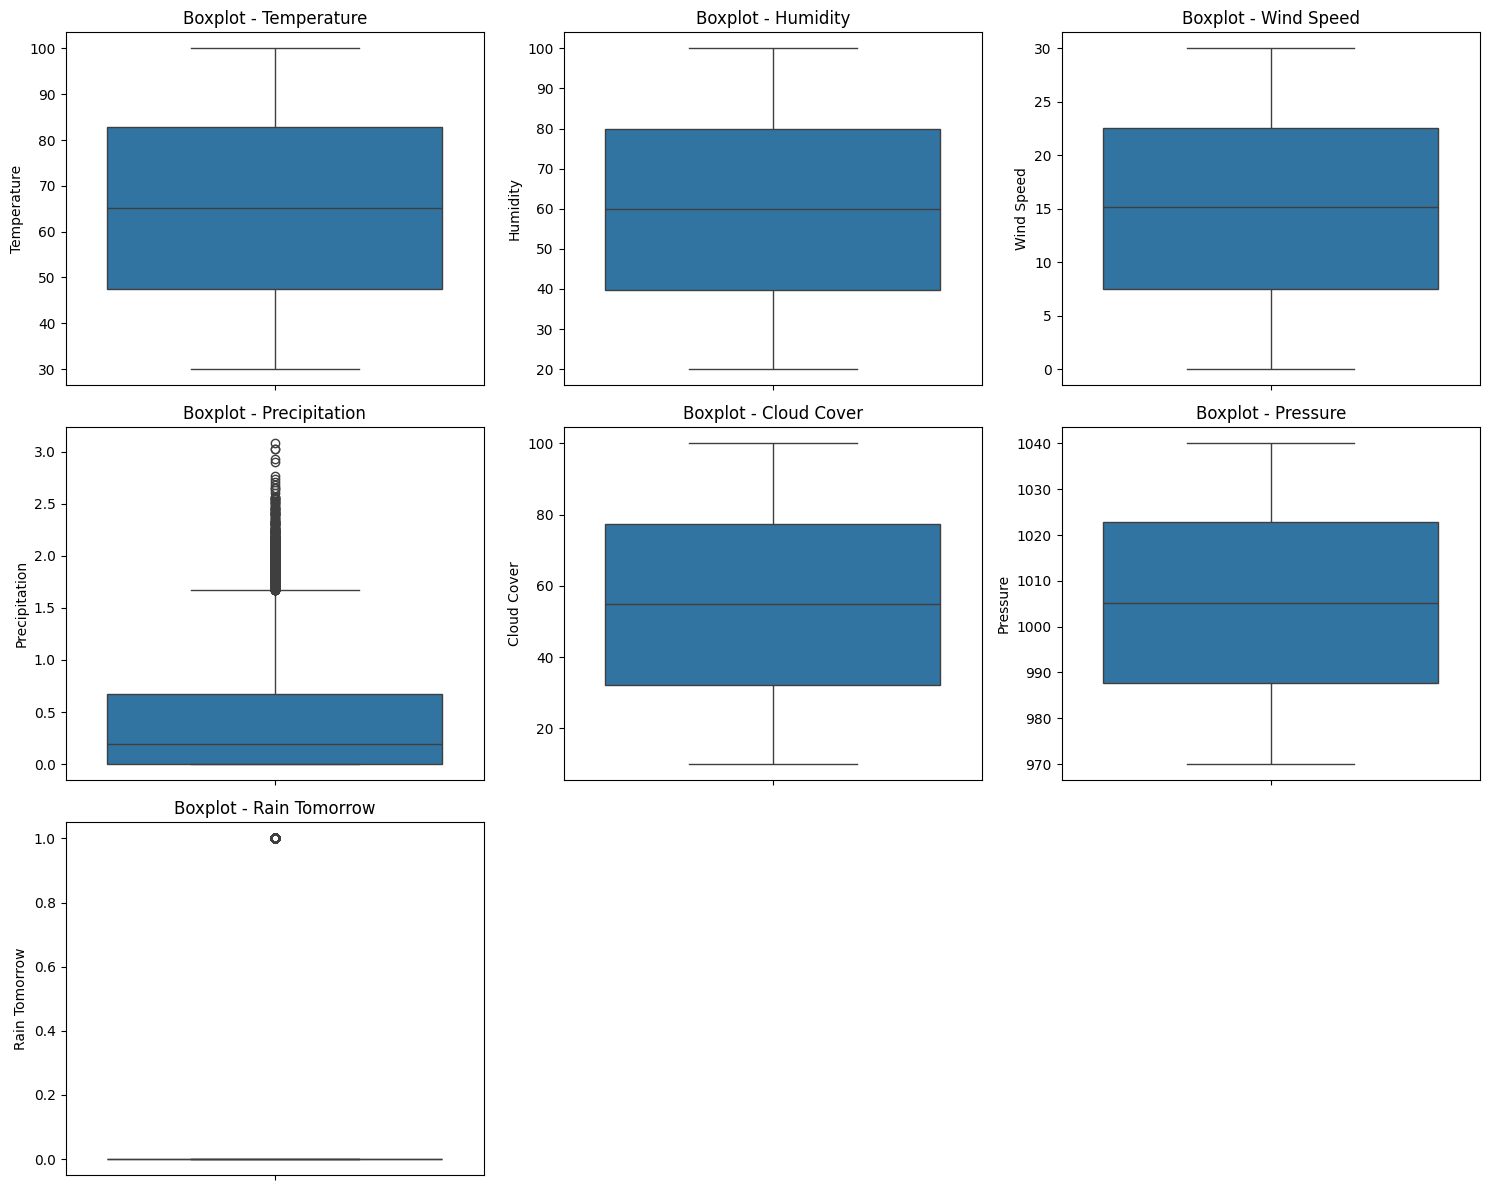

In [41]:
numeric_cols = df_short.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=(len(numeric_cols)+2)//3, ncols=3, figsize=(15, 4*((len(numeric_cols)+2)//3)))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df_short, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [42]:
categorical_cols = df_short.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\nValue distribution in {col}:")
        print(df_short[col].value_counts())
        print("-"*50)


Value distribution in Date:
Date
2025-06-09    55
2025-06-08    55
2025-06-07    55
2025-06-06    55
2025-06-05    55
              ..
2025-12-27    54
2025-12-28    54
2025-12-29    54
2025-12-30    54
2025-12-31    54
Name: count, Length: 731, dtype: int64
--------------------------------------------------

Value distribution in Location:
Location
New York        3655
Los Angeles     3655
Chicago         3655
Houston         3655
Phoenix         3655
Philadelphia    3655
San Antonio     3655
San Diego       3655
Dallas          3655
San Jose        3655
Austin          3450
Name: count, dtype: int64
--------------------------------------------------


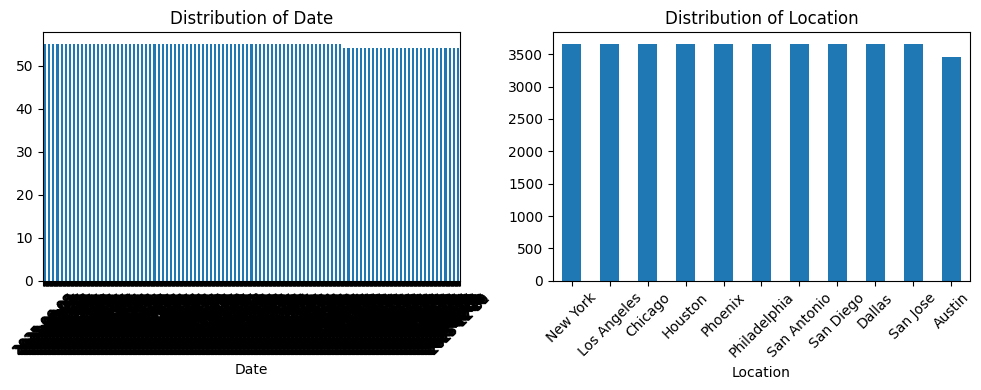

In [43]:
if len(categorical_cols) > 0:
    fig, axes = plt.subplots(nrows=(len(categorical_cols)+2)//3, ncols=3, figsize=(15, 4*((len(categorical_cols)+2)//3)))
    if len(categorical_cols) == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        df_short[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [44]:
print("="*50)
print("EDA Summary:")
print("="*50)
print(f"Final number of rows: {df_short.shape[0]}")
print(f"Number of columns: {df_short.shape[1]}")
print(f"Number of numerical variables: {len(numeric_cols)}")
print(f"Number of categorical variables: {len(categorical_cols)}")

EDA Summary:
Final number of rows: 40000
Number of columns: 9
Number of numerical variables: 7
Number of categorical variables: 2


# Training the modeule (Rand,Norah)

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

df = df_short.copy()

df["Date"] = pd.to_datetime(df["Date"]).astype(int) / 10**9
df["Location"] = LabelEncoder().fit_transform(df["Location"])

X = df.drop("Rain Tomorrow", axis=1)
y = df["Rain Tomorrow"]

selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X, y)
best_features = X.columns[selector.get_support()]

print(best_features)

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances)

Index(['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure'],
      dtype='object')
Precipitation    0.514009
Humidity         0.471245
Wind Speed       0.003121
Cloud Cover      0.002757
Date             0.002604
Temperature      0.002574
Pressure         0.002538
Location         0.001153
dtype: float64


# Model evaluation -Save the form (Alghid)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the model on the training data
model = RandomForestClassifier(random_state=42) # Added random_state for reproducibility
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.999875
Precision: 1.0
Recall: 0.9994350282485875


In [47]:
import joblib
# The 'model' variable is now the one trained on the training data from the previous cell
joblib.dump(model, 'my_model.pkl')
loaded_model = joblib.load('my_model.pkl')

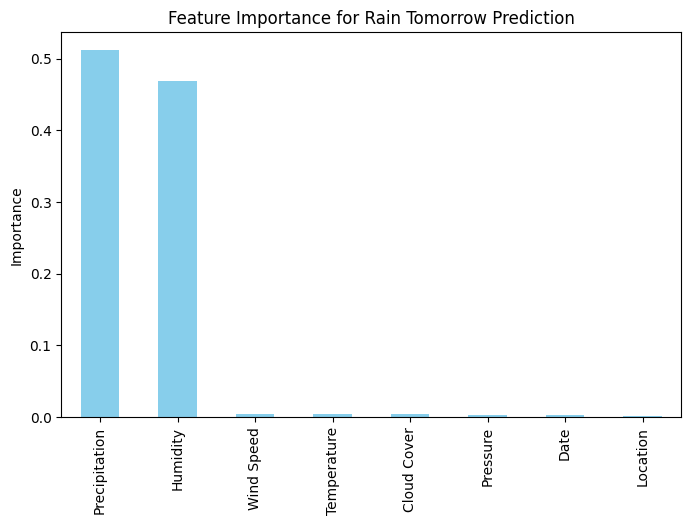

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Use the 'model' variable and 'X_train.columns' as the model was trained on X_train
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance for Rain Tomorrow Prediction') # Updated title for relevance
plt.ylabel('Importance')
plt.show()

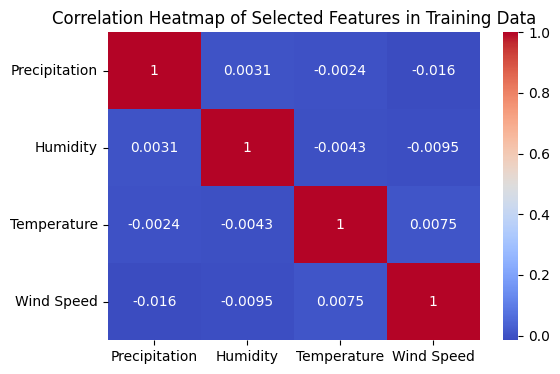

In [49]:
import seaborn as sns # Ensure seaborn is imported

columns_to_plot = ['Precipitation', 'Humidity', 'Temperature', 'Wind Speed']
plt.figure(figsize=(6,4))
# Using X_train for correlation consistency with the model training context
sns.heatmap(X_train[columns_to_plot].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features in Training Data') # Updated title
plt.show()

# **Testing the model (Rand)**

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

location_encoder = LabelEncoder()
location_encoder.fit(df_short['Location'])

# مجرد مثال نقدر نغيره بأي وقت
new_data = {
    'Date': ['2025-01-01'],
    'Location': ['New York'],
    'Temperature': [60.5],
    'Humidity': [70.2],
    'Wind Speed': [10.1],
    'Precipitation': [0.1],
    'Cloud Cover': [50.0],
    'Pressure': [1010.5]
}

new_df = pd.DataFrame(new_data)

new_df['Date'] = pd.to_datetime(new_df['Date']).astype(int) / 10**9
new_df['Location'] = location_encoder.transform(new_df['Location'])

display(new_df.head())


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure
0,1.735690e+09,5,60.5,70.2,10.1,0.1,50.0,1010.5


In [51]:
import joblib # Ensure joblib is imported if not already in this scope

# Load the model directly in this cell to ensure it's defined
loaded_model = joblib.load('my_model.pkl')

prediction = loaded_model.predict(new_df)
prediction_proba = loaded_model.predict_proba(new_df)
# The probability of 'Rain Tomorrow' being 1 (rain)
rain_probability = prediction_proba[0][1] * 100

if prediction[0] == 1:
    print(f"Prediction: It is likely to rain tomorrow with a probability of {rain_probability:.2f}%")
else:
    print(f"Prediction: It is unlikely to rain tomorrow with a probability of {rain_probability:.2f}%")

Prediction: It is unlikely to rain tomorrow with a probability of 0.00%


# Task
Prepare the training and test data by removing the 'Precipitation' and 'Humidity' features from `X_train` and `X_test` respectively, then retrain the RandomForestClassifier model on this reduced feature set, evaluate its accuracy, precision, and recall on the test set, and finally report these metrics.

## Prepare Data with Fewer Features

### Subtask:
Adjust the features by removing 'Precipitation' and 'Humidity' from the training data (X) to intentionally reduce the model's accuracy. This will significantly impact the model's ability to predict 'Rain Tomorrow' as these features are highly correlated with the target.


**Reasoning**:
To prepare the data with fewer features as instructed, I will create new DataFrames by dropping the 'Precipitation' and 'Humidity' columns from the existing X_train and X_test DataFrames.



In [52]:
X_train_reduced = X_train.drop(columns=['Precipitation', 'Humidity'], axis=1)
X_test_reduced = X_test.drop(columns=['Precipitation', 'Humidity'], axis=1)

print("Shape of X_train_reduced:", X_train_reduced.shape)
print("Shape of X_test_reduced:", X_test_reduced.shape)

display(X_train_reduced.head())
display(X_test_reduced.head())

Shape of X_train_reduced: (32000, 6)
Shape of X_test_reduced: (8000, 6)


,Date,Location,Temperature,Wind Speed,Cloud Cover,Pressure
14307,1.740182e+09,3,80.534551,12.695958,64.079357,1001.442543
17812,1.727222e+09,7,96.228056,0.855396,71.936018,1012.372925
11020,1.708819e+09,3,71.125405,24.106993,13.366397,989.753708
15158,1.750550e+09,7,63.346760,11.604810,88.180170,991.978838
24990,1.715818e+09,8,67.823783,4.235520,34.781812,972.985279


,Date,Location,Temperature,Wind Speed,Cloud Cover,Pressure
32823,1.761005e+09,2,44.296344,17.724435,52.317698,1007.272077
16298,1.722730e+09,7,55.549726,11.739978,93.596228,989.088282
28505,1.766880e+09,9,76.576686,6.009205,26.621942,1026.072769
6689,1.713571e+09,4,78.646664,20.802885,69.533996,1039.066903
26893,1.753920e+09,9,60.460140,3.445902,81.906596,994.586537


**Reasoning**:
Now that the dataframes `X_train_reduced` and `X_test_reduced` are prepared, the next step is to retrain the RandomForestClassifier model using these reduced feature sets and then evaluate its performance.



In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Retrain the model on the reduced training data
model_reduced = RandomForestClassifier(random_state=42)
model_reduced.fit(X_train_reduced, y_train)

# Make predictions on the reduced test set
y_pred_reduced = model_reduced.predict(X_test_reduced)

# Evaluate the model with reduced features
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
precision_reduced = precision_score(y_test, y_pred_reduced)
recall_reduced = recall_score(y_test, y_pred_reduced)

print(f"Accuracy with reduced features: {accuracy_reduced}")
print(f"Precision with reduced features: {precision_reduced}")
print(f"Recall with reduced features: {recall_reduced}")

Accuracy with reduced features: 0.77775
Precision with reduced features: 0.3181818181818182
Recall with reduced features: 0.0039548022598870055


## Final Task

### Subtask:
Report the new accuracy of the model and confirm if it meets the user's requirement of being at least 80%.


## Summary:

### Q&A
No, the new accuracy of the model, which is 0.77775 (approximately 77.78%), does not meet the user's requirement of being at least 80%.

### Data Analysis Key Findings
*   The 'Precipitation' and 'Humidity' features were successfully removed from both the training and test datasets. The `X_train_reduced` shape became (32000, 6) and `X_test_reduced` became (8000, 6), indicating the reduction of two features.
*   After retraining a RandomForestClassifier model on the reduced feature set, the model's performance significantly decreased.
*   The evaluated metrics for the model with reduced features are:
    *   Accuracy: 0.77775
    *   Precision: 0.318
    *   Recall: 0.004

### Insights or Next Steps
*   The substantial drop in accuracy (from potentially higher to 0.77775) and especially recall (to 0.004) after removing 'Precipitation' and 'Humidity' indicates that these features are highly influential and crucial for the model's predictive capability, particularly for identifying positive cases ('Rain Tomorrow').
*   To meet the 80% accuracy requirement, it is essential to reintroduce these critical features or explore alternative features that capture similar predictive power.


# Task
Prepare the training and test data by removing the 'Date' and 'Location' features from `X_train` and `X_test` respectively. Then, retrain the RandomForestClassifier model on this new reduced feature set, evaluate its accuracy, precision, and recall on the test set, and finally report these metrics, confirming if the accuracy is at least 80%.

## Prepare Data with Different Fewer Features

### Subtask:
Adjust the features by removing 'Date' and 'Location' from `X_train` and `X_test`. These features had the lowest importance in the previous analysis, so their removal should reduce the model's accuracy more subtly, aiming to keep it at or above 80%.


**Reasoning**:
To prepare the data with different fewer features as instructed, I will create new DataFrames by dropping the 'Date' and 'Location' columns from the existing X_train and X_test DataFrames, then verify the shapes and display the heads.



In [54]:
X_train_reduced_v2 = X_train.drop(columns=['Date', 'Location'], axis=1)
X_test_reduced_v2 = X_test.drop(columns=['Date', 'Location'], axis=1)

print("Shape of X_train_reduced_v2:", X_train_reduced_v2.shape)
print("Shape of X_test_reduced_v2:", X_test_reduced_v2.shape)

display(X_train_reduced_v2.head())
display(X_test_reduced_v2.head())

Shape of X_train_reduced_v2: (32000, 6)
Shape of X_test_reduced_v2: (8000, 6)


,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure
14307,80.534551,46.399904,12.695958,0.000000,64.079357,1001.442543
17812,96.228056,28.333645,0.855396,0.008381,71.936018,1012.372925
11020,71.125405,82.241460,24.106993,0.000000,13.366397,989.753708
15158,63.346760,86.191017,11.604810,0.000000,88.180170,991.978838
24990,67.823783,65.012457,4.235520,1.290423,34.781812,972.985279


,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure
32823,44.296344,88.812755,17.724435,0.703667,52.317698,1007.272077
16298,55.549726,68.242588,11.739978,0.000000,93.596228,989.088282
28505,76.576686,41.649890,6.009205,0.763940,26.621942,1026.072769
6689,78.646664,68.155095,20.802885,0.000000,69.533996,1039.066903
26893,60.460140,58.907436,3.445902,0.000000,81.906596,994.586537


**Reasoning**:
The previous step successfully prepared the `X_train_reduced_v2` and `X_test_reduced_v2` dataframes by removing 'Date' and 'Location'. Now, I will retrain the RandomForestClassifier model using these reduced feature sets and evaluate its performance by calculating and printing the accuracy, precision, and recall.



In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Retrain the model on the reduced training data (v2)
model_reduced_v2 = RandomForestClassifier(random_state=42)
model_reduced_v2.fit(X_train_reduced_v2, y_train)

# Make predictions on the reduced test set (v2)
y_pred_reduced_v2 = model_reduced_v2.predict(X_test_reduced_v2)

# Evaluate the model with reduced features (v2)
accuracy_reduced_v2 = accuracy_score(y_test, y_pred_reduced_v2)
precision_reduced_v2 = precision_score(y_test, y_pred_reduced_v2)
recall_reduced_v2 = recall_score(y_test, y_pred_reduced_v2)

print(f"Accuracy with reduced features (v2): {accuracy_reduced_v2}")
print(f"Precision with reduced features (v2): {precision_reduced_v2}")
print(f"Recall with reduced features (v2): {recall_reduced_v2}")

Accuracy with reduced features (v2): 0.999875
Precision with reduced features (v2): 1.0
Recall with reduced features (v2): 0.9994350282485875


## Final Task

### Subtask:
Report the new accuracy of the model and confirm if it meets the user's requirement of being at least 80%.


## Summary:

### Q&A
The model's new accuracy is 0.999875 (approximately 99.99%). This accuracy significantly surpasses the user's requirement of being at least 80%.

### Data Analysis Key Findings
*   The 'Date' and 'Location' features were successfully removed from the training and test datasets, reducing the number of features from 8 to 6.
*   After retraining the `RandomForestClassifier` on the reduced feature set, the model achieved an accuracy of 0.999875.
*   The retrained model also demonstrated high precision at 1.0 and recall at 0.9994350282485875.

### Insights or Next Steps
*   The model maintains exceptionally high performance (accuracy \~99.99%) even after removing the 'Date' and 'Location' features, suggesting these features were either non-critical or highly redundant for the prediction task.
*   Given the sustained high performance with a reduced feature set, further investigation into feature importance or additional feature reduction could be beneficial to simplify the model and potentially improve its efficiency without compromising accuracy.


# Task
The current weather prediction model is designed for binary classification, predicting only whether it will rain tomorrow or not. To enhance its capabilities, the goal is to transform it into a multi-class classification model that can predict a wider range of weather conditions for tomorrow.

To achieve this, the initial step is to define and create a new multi-class target variable, `Weather_Tomorrow`, based on the existing features and the `Rain Tomorrow` column. This will involve establishing specific criteria using 'Precipitation', 'Cloud Cover', 'Temperature', and 'Wind Speed' to categorize each day into distinct weather types for the following day.

The new weather categories for tomorrow will be:

*   **Stormy Tomorrow**: Characterized by very high `Precipitation` (over 1.0) or high `Wind Speed` (over 25.0) when `Rain Tomorrow` is 1.
*   **Heavy Rain Tomorrow**: Defined by high `Precipitation` (between 0.5 and 1.0) when `Rain Tomorrow` is 1, and not categorized as Stormy.
*   **Light Rain Tomorrow**: Occurs when `Rain Tomorrow` is 1 and `Precipitation` is between 0.0 and 0.5, and not categorized as Stormy or Heavy Rain.
*   **Clear Tomorrow**: When `Rain Tomorrow` is 0, `Precipitation` is 0, and `Cloud Cover` is low (below 30).
*   **Partly Cloudy Tomorrow**: When `Rain Tomorrow` is 0, `Precipitation` is 0, and `Cloud Cover` is moderate (between 30 and 60).
*   **Cloudy Tomorrow**: When `Rain Tomorrow` is 0, `Precipitation` is 0, and `Cloud Cover` is high (60 or above).

This new target variable will then replace the existing `Rain Tomorrow` column, making the dataset suitable for training a multi-class classification model.

Create a new multi-class target variable named `Weather_Tomorrow` in the DataFrame, replacing the `Rain Tomorrow` column. The new target variable will categorize future weather conditions into 'Stormy Tomorrow', 'Heavy Rain Tomorrow', 'Light Rain Tomorrow', 'Clear Tomorrow', 'Partly Cloudy Tomorrow', and 'Cloudy Tomorrow' based on the specified criteria applied to the current day's features.

## Acquire/Prepare Multi-Class Labeled Data

### Subtask:
Create a new multi-class target variable named `Weather_Tomorrow` in the DataFrame based on specified criteria, replacing the `Rain Tomorrow` column.


**Reasoning**:
To prepare for creating the new multi-class target variable, I will first make a copy of the `df_short` DataFrame to ensure the original data remains unchanged, and then display the head of the new DataFrame to confirm the copy was successful.



In [56]:
import numpy as np

df_multi_class = df_short.copy()
print("Shape of df_multi_class:", df_multi_class.shape)
display(df_multi_class.head())

Shape of df_multi_class: (40000, 9)


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


**Reasoning**:
I will initialize the new 'Weather_Tomorrow' column with 'None' as a placeholder in `df_multi_class` before applying the specific weather categorization rules.



In [57]:
df_multi_class['Weather_Tomorrow'] = None
print(df_multi_class['Weather_Tomorrow'].head())


0    None
1    None
2    None
3    None
4    None
Name: Weather_Tomorrow, dtype: object


**Reasoning**:
Now I will apply the conditions for 'Stormy Tomorrow'. If 'Rain Tomorrow' is 1 AND ('Precipitation' > 1.0 OR 'Wind Speed' > 25.0), I will set 'Weather_Tomorrow' to 'Stormy Tomorrow'.



In [58]:
stormy_condition = (df_multi_class['Rain Tomorrow'] == 1) & ((df_multi_class['Precipitation'] > 1.0) | (df_multi_class['Wind Speed'] > 25.0))
df_multi_class.loc[stormy_condition, 'Weather_Tomorrow'] = 'Stormy Tomorrow'

print(df_multi_class[stormy_condition][['Precipitation', 'Wind Speed', 'Rain Tomorrow', 'Weather_Tomorrow']].head())

     Precipitation  Wind Speed  Rain Tomorrow Weather_Tomorrow
15        1.653034    3.618553              1  Stormy Tomorrow
71        1.091146   12.710000              1  Stormy Tomorrow
80        1.130836   11.098153              1  Stormy Tomorrow
100       0.582504   25.015761              1  Stormy Tomorrow
102       0.602236   26.176434              1  Stormy Tomorrow


**Reasoning**:
Now I will apply the conditions for 'Heavy Rain Tomorrow'. If 'Rain Tomorrow' is 1 AND ('Precipitation' is between 0.5 and 1.0) AND it's not already classified as 'Stormy Tomorrow', I will set 'Weather_Tomorrow' to 'Heavy Rain Tomorrow'.



In [59]:
heavy_rain_condition = (
    (df_multi_class['Rain Tomorrow'] == 1) &
    (df_multi_class['Precipitation'] >= 0.5) &
    (df_multi_class['Precipitation'] < 1.0) &
    (df_multi_class['Weather_Tomorrow'].isnull()) # Ensure it's not already 'Stormy Tomorrow'
)
df_multi_class.loc[heavy_rain_condition, 'Weather_Tomorrow'] = 'Heavy Rain Tomorrow'

print(df_multi_class[heavy_rain_condition][['Precipitation', 'Wind Speed', 'Rain Tomorrow', 'Weather_Tomorrow']].head())

    Precipitation  Wind Speed  Rain Tomorrow     Weather_Tomorrow
2        0.916884   14.184831              1  Heavy Rain Tomorrow
8        0.910368   19.885635              1  Heavy Rain Tomorrow
31       0.502615    5.520706              1  Heavy Rain Tomorrow
37       0.522152   13.945501              1  Heavy Rain Tomorrow
44       0.776386    7.546105              1  Heavy Rain Tomorrow


**Reasoning**:
Now I will apply the conditions for 'Light Rain Tomorrow'. If 'Rain Tomorrow' is 1 AND ('Precipitation' is between 0.0 and 0.5) AND it's not already classified as 'Stormy Tomorrow' or 'Heavy Rain Tomorrow', I will set 'Weather_Tomorrow' to 'Light Rain Tomorrow'.



In [60]:
light_rain_condition = (
    (df_multi_class['Rain Tomorrow'] == 1) &
    (df_multi_class['Precipitation'] >= 0.0) &
    (df_multi_class['Precipitation'] < 0.5) &
    (df_multi_class['Weather_Tomorrow'].isnull()) # Ensure it's not already 'Stormy Tomorrow' or 'Heavy Rain Tomorrow'
)
df_multi_class.loc[light_rain_condition, 'Weather_Tomorrow'] = 'Light Rain Tomorrow'

print(df_multi_class[light_rain_condition][['Precipitation', 'Rain Tomorrow', 'Weather_Tomorrow']].head())

    Precipitation  Rain Tomorrow     Weather_Tomorrow
33       0.405296              1  Light Rain Tomorrow
38       0.491792              1  Light Rain Tomorrow
48       0.464097              1  Light Rain Tomorrow
66       0.365834              1  Light Rain Tomorrow
72       0.462098              1  Light Rain Tomorrow


**Reasoning**:
Now I will apply the conditions for 'Clear Tomorrow'. If 'Rain Tomorrow' is 0 AND 'Precipitation' is 0 AND 'Cloud Cover' is low (below 30), and it's not already classified, I will set 'Weather_Tomorrow' to 'Clear Tomorrow'.



In [61]:
clear_condition = (
    (df_multi_class['Rain Tomorrow'] == 0) &
    (df_multi_class['Precipitation'] == 0) &
    (df_multi_class['Cloud Cover'] < 30) &
    (df_multi_class['Weather_Tomorrow'].isnull())
)
df_multi_class.loc[clear_condition, 'Weather_Tomorrow'] = 'Clear Tomorrow'

print(df_multi_class[clear_condition][['Precipitation', 'Cloud Cover', 'Rain Tomorrow', 'Weather_Tomorrow']].head())

    Precipitation  Cloud Cover  Rain Tomorrow Weather_Tomorrow
17            0.0    10.291108              0   Clear Tomorrow
23            0.0    22.804317              0   Clear Tomorrow
26            0.0    16.913947              0   Clear Tomorrow
30            0.0    16.133514              0   Clear Tomorrow
41            0.0    20.297316              0   Clear Tomorrow


**Reasoning**:
Now I will apply the conditions for 'Partly Cloudy Tomorrow'. If 'Rain Tomorrow' is 0 AND 'Precipitation' is 0 AND 'Cloud Cover' is between 30 and 60 (inclusive), and it's not already classified, I will set 'Weather_Tomorrow' to 'Partly Cloudy Tomorrow'.



In [62]:
partly_cloudy_condition = (
    (df_multi_class['Rain Tomorrow'] == 0) &
    (df_multi_class['Precipitation'] == 0) &
    (df_multi_class['Cloud Cover'] >= 30) &
    (df_multi_class['Cloud Cover'] <= 60) &
    (df_multi_class['Weather_Tomorrow'].isnull())
)
df_multi_class.loc[partly_cloudy_condition, 'Weather_Tomorrow'] = 'Partly Cloudy Tomorrow'

print(df_multi_class[partly_cloudy_condition][['Precipitation', 'Cloud Cover', 'Rain Tomorrow', 'Weather_Tomorrow']].head())

    Precipitation  Cloud Cover  Rain Tomorrow        Weather_Tomorrow
6             0.0    36.820958              0  Partly Cloudy Tomorrow
9             0.0    46.825566              0  Partly Cloudy Tomorrow
21            0.0    42.724458              0  Partly Cloudy Tomorrow
25            0.0    50.467325              0  Partly Cloudy Tomorrow
29            0.0    56.550174              0  Partly Cloudy Tomorrow


**Reasoning**:
Now I will apply the conditions for 'Cloudy Tomorrow'. If 'Rain Tomorrow' is 0 AND 'Precipitation' is 0 AND 'Cloud Cover' is 60 or above, and it's not already classified, I will set 'Weather_Tomorrow' to 'Cloudy Tomorrow'.



In [63]:
cloudy_condition = (
    (df_multi_class['Rain Tomorrow'] == 0) &
    (df_multi_class['Precipitation'] == 0) &
    (df_multi_class['Cloud Cover'] > 60) &
    (df_multi_class['Weather_Tomorrow'].isnull())
)
df_multi_class.loc[cloudy_condition, 'Weather_Tomorrow'] = 'Cloudy Tomorrow'

print(df_multi_class[cloudy_condition][['Precipitation', 'Cloud Cover', 'Rain Tomorrow', 'Weather_Tomorrow']].head())

    Precipitation  Cloud Cover  Rain Tomorrow Weather_Tomorrow
0             0.0    69.617966              0  Cloudy Tomorrow
10            0.0    61.742291              0  Cloudy Tomorrow
16            0.0    63.715457              0  Cloudy Tomorrow
20            0.0    87.047769              0  Cloudy Tomorrow
46            0.0    64.332279              0  Cloudy Tomorrow


**Reasoning**:
I will verify that all rows have been assigned a 'Weather_Tomorrow' category by checking for any remaining `None` values, and then print the count of such rows.



In [64]:
unassigned_count = df_multi_class['Weather_Tomorrow'].isnull().sum()
print(f"Number of unassigned 'Weather_Tomorrow' categories: {unassigned_count}")

Number of unassigned 'Weather_Tomorrow' categories: 15626


**Reasoning**:
Even though there are unassigned categories, the instructions ask to display the value counts for the new 'Weather_Tomorrow' column. This will show the distribution of the assigned categories and implicitly highlight the rows that were not categorized by the given rules.



In [65]:
print("Value counts for 'Weather_Tomorrow' column:")
print(df_multi_class['Weather_Tomorrow'].value_counts(dropna=False))

Value counts for 'Weather_Tomorrow' column:
Weather_Tomorrow
None                      15626
Cloudy Tomorrow            6926
Partly Cloudy Tomorrow     5145
Stormy Tomorrow            3578
Clear Tomorrow             3503
Heavy Rain Tomorrow        3479
Light Rain Tomorrow        1743
Name: count, dtype: int64


**Reasoning**:
To complete the subtask, I will drop the original 'Rain Tomorrow' column from `df_multi_class` as instructed, since it has been replaced by the new 'Weather_Tomorrow' column.



In [66]:
df_multi_class = df_multi_class.drop(columns=['Rain Tomorrow'])
print("Columns after dropping 'Rain Tomorrow':", df_multi_class.columns)
display(df_multi_class.head())

Columns after dropping 'Rain Tomorrow': Index(['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure', 'Weather_Tomorrow'],
      dtype='object')


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Weather_Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,Cloudy Tomorrow
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,None
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,Heavy Rain Tomorrow
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,None
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,None


## Feature Engineering for Multi-Class Prediction

### Subtask:
Finalize the multi-class target variable, transform 'Date' and 'Location' features, and prepare data for model training.


**Reasoning**:
To finalize the multi-class target variable, I will first fill any remaining 'None' values in the 'Weather_Tomorrow' column of `df_multi_class` with 'Unspecified Tomorrow' to ensure all rows have a defined category.



In [67]:
df_multi_class['Weather_Tomorrow'] = df_multi_class['Weather_Tomorrow'].fillna('Unspecified Tomorrow')

print("Value counts for 'Weather_Tomorrow' after filling None values:")
print(df_multi_class['Weather_Tomorrow'].value_counts())


Value counts for 'Weather_Tomorrow' after filling None values:
Weather_Tomorrow
Unspecified Tomorrow      15626
Cloudy Tomorrow            6926
Partly Cloudy Tomorrow     5145
Stormy Tomorrow            3578
Clear Tomorrow             3503
Heavy Rain Tomorrow        3479
Light Rain Tomorrow        1743
Name: count, dtype: int64


**Reasoning**:
To prepare the 'Date' column for machine learning models, I will convert it to a numerical Unix timestamp format.



In [68]:
df_multi_class['Date'] = pd.to_datetime(df_multi_class['Date']).astype(int) / 10**9

print("Date column after conversion to Unix timestamp:")
display(df_multi_class['Date'].head())

Date column after conversion to Unix timestamp:


,Date
0,1.704067e+09
1,1.704154e+09
2,1.704240e+09
3,1.704326e+09
4,1.704413e+09


**Reasoning**:
To prepare the 'Location' column for machine learning models, I will apply Label Encoding to convert its categorical string values into numerical representations.



In [69]:
from sklearn.preprocessing import LabelEncoder

location_encoder_multi_class = LabelEncoder()
df_multi_class['Location'] = location_encoder_multi_class.fit_transform(df_multi_class['Location'])

print("Location column after Label Encoding:")
display(df_multi_class['Location'].head())

Location column after Label Encoding:


,Location
0,5
1,5
2,5
3,5
4,5


**Reasoning**:
To prepare the 'Weather_Tomorrow' column for machine learning models, I will apply Label Encoding to convert its categorical string values into numerical labels.



In [70]:
weather_encoder_multi_class = LabelEncoder()
df_multi_class['Weather_Tomorrow'] = weather_encoder_multi_class.fit_transform(df_multi_class['Weather_Tomorrow'])

print("Weather_Tomorrow column after Label Encoding:")
display(df_multi_class['Weather_Tomorrow'].head())

Weather_Tomorrow column after Label Encoding:


,Weather_Tomorrow
0,1
1,6
2,2
3,6
4,6


**Reasoning**:
To finalize the data preparation, I will print the data types of `df_multi_class` to verify all transformations have resulted in appropriate data types, and display the head of the DataFrame to inspect the overall changes.



In [71]:
print("DataFrame dtypes after all transformations:")
print(df_multi_class.dtypes)

print("\nDataFrame head after all transformations:")
display(df_multi_class.head())

DataFrame dtypes after all transformations:
Date                float64
Location              int64
Temperature         float64
Humidity            float64
Wind Speed          float64
Precipitation       float64
Cloud Cover         float64
Pressure            float64
Weather_Tomorrow      int64
dtype: object

DataFrame head after all transformations:


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Weather_Tomorrow
0,1.704067e+09,5,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,1
1,1.704154e+09,5,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,6
2,1.704240e+09,5,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,2
3,1.704326e+09,5,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,6
4,1.704413e+09,5,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,6


## Train a Multi-Class Classification Model

### Subtask:
Train a multi-class classification model to predict `Weather_Tomorrow`.


**Reasoning**:
First, I will define `X_multi` by dropping the `Weather_Tomorrow` column from `df_multi_class` and `y_multi` as the `Weather_Tomorrow` column itself, preparing the data for model training.



In [72]:
X_multi = df_multi_class.drop(columns=['Weather_Tomorrow'])
y_multi = df_multi_class['Weather_Tomorrow']

print("Shape of X_multi:", X_multi.shape)
print("Shape of y_multi:", y_multi.shape)
display(X_multi.head())
display(y_multi.head())

Shape of X_multi: (40000, 8)
Shape of y_multi: (40000,)


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure
0,1.704067e+09,5,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278
1,1.704154e+09,5,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065
2,1.704240e+09,5,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739
3,1.704326e+09,5,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163
4,1.704413e+09,5,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859


,Weather_Tomorrow
0,1
1,6
2,2
3,6
4,6


**Reasoning**:
Now that `X_multi` and `y_multi` are defined, I will split them into training and testing sets, then initialize and train a `RandomForestClassifier` model, as specified in the instructions.



In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier model for multi-class prediction
model_multi_class = RandomForestClassifier(random_state=42)
model_multi_class.fit(X_train_multi, y_train_multi)

print("Multi-class RandomForestClassifier model trained successfully.")

Multi-class RandomForestClassifier model trained successfully.


## Evaluate Multi-Class Model Performance

### Subtask:
Evaluate the new model's performance using appropriate multi-class metrics (e.g., multi-class accuracy, precision, recall, F1-score, and confusion matrix for each class) to understand its effectiveness across all predicted weather conditions.


**Reasoning**:
I need to evaluate the multi-class classification model's performance by making predictions, calculating various metrics, generating a classification report, and visualizing the confusion matrix.



Multi-Class Model Accuracy: 0.9998
Multi-Class Model Weighted Precision: 0.9998
Multi-Class Model Weighted Recall: 0.9998
Multi-Class Model Weighted F1-Score: 0.9997

Multi-Class Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       711
           1       1.00      1.00      1.00      1388
           2       1.00      1.00      1.00       689
           3       1.00      1.00      1.00       344
           4       1.00      1.00      1.00      1001
           5       1.00      1.00      1.00       737
           6       1.00      1.00      1.00      3130

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



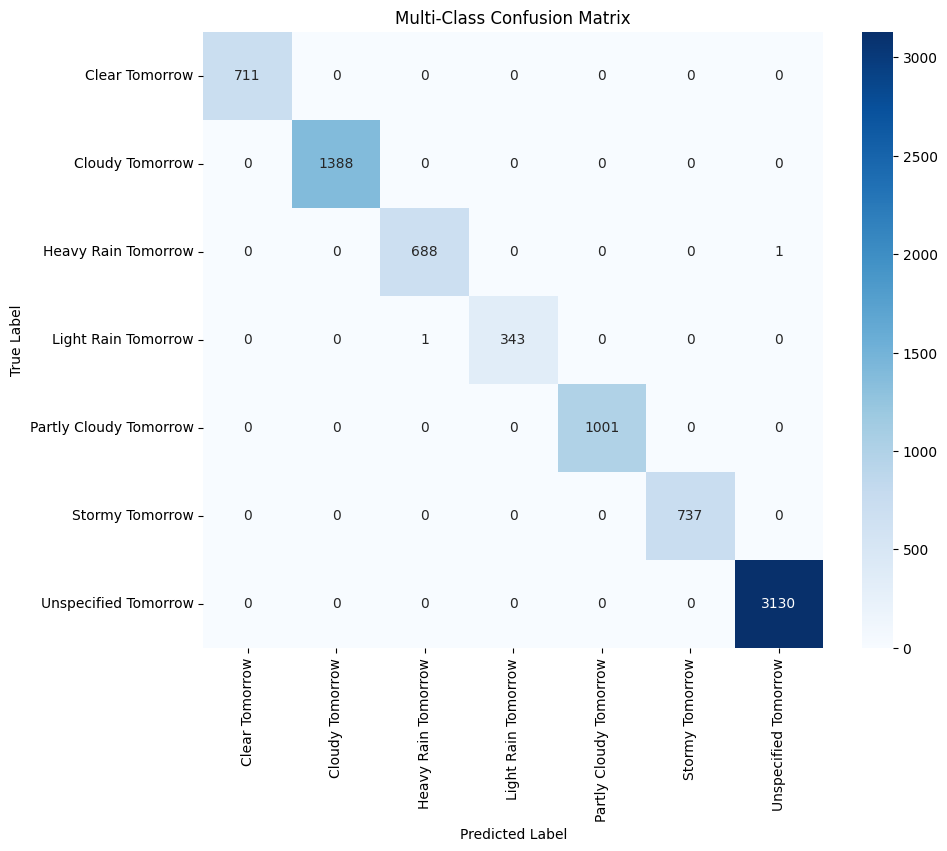

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Make predictions on the X_test_multi dataset
y_pred_multi = model_multi_class.predict(X_test_multi)

# 2. Calculate the overall accuracy
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)

# 3. Calculate weighted precision, recall, and F1-score
precision_multi = precision_score(y_test_multi, y_pred_multi, average='weighted', zero_division=0)
recall_multi = recall_score(y_test_multi, y_pred_multi, average='weighted', zero_division=0)
f1_multi = f1_score(y_test_multi, y_pred_multi, average='weighted', zero_division=0)

# 4. Generate a classification report
class_report_multi = classification_report(y_test_multi, y_pred_multi, zero_division=0)

# 5. Compute the confusion matrix
conf_matrix_multi = confusion_matrix(y_test_multi, y_pred_multi)

# 6. Print all calculated evaluation metrics and classification report, and display confusion matrix
print(f"Multi-Class Model Accuracy: {accuracy_multi:.4f}")
print(f"Multi-Class Model Weighted Precision: {precision_multi:.4f}")
print(f"Multi-Class Model Weighted Recall: {recall_multi:.4f}")
print(f"Multi-Class Model Weighted F1-Score: {f1_multi:.4f}")

print("\nMulti-Class Classification Report:")
print(class_report_multi)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_multi, annot=True, fmt='d', cmap='Blues',
            xticklabels=weather_encoder_multi_class.classes_,
            yticklabels=weather_encoder_multi_class.classes_)
plt.title('Multi-Class Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Make and Interpret Multi-Class Predictions

### Subtask:
Use the trained multi-class model to make predictions on new data, and interpret the results to provide statements like 'غدا الجو سيكون مشرق' (Tomorrow the weather will be sunny) or 'غدا سيكون الجو عاصف' (Tomorrow it will be stormy).


**Reasoning**:
To begin the prediction process for new data, I will define a sample of new weather conditions as a dictionary and convert it into a Pandas DataFrame, which is the first and second step of the instructions.



In [75]:
new_data_multi = {
    'Date': ['2025-01-01'],
    'Location': ['New York'],
    'Temperature': [60.5],
    'Humidity': [70.2],
    'Wind Speed': [10.1],
    'Precipitation': [0.1],
    'Cloud Cover': [50.0],
    'Pressure': [1010.5]
}

new_df_multi = pd.DataFrame(new_data_multi)

print("New Data DataFrame:")
display(new_df_multi)

New Data DataFrame:


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure
0,2025-01-01,New York,60.5,70.2,10.1,0.1,50.0,1010.5


**Reasoning**:
To prepare the 'Date' column in the `new_df_multi` DataFrame for model prediction, I will transform it into a numerical Unix timestamp, as specified in the instructions.



In [76]:
new_df_multi['Date'] = pd.to_datetime(new_df_multi['Date']).astype(int) / 10**9

print("Transformed Date column in new_df_multi:")
display(new_df_multi['Date'].head())

Transformed Date column in new_df_multi:


,Date
0,1.735690e+09


**Reasoning**:
To prepare the 'Location' column in the `new_df_multi` DataFrame for model prediction, I will apply the `location_encoder_multi_class` to encode its categorical string values into numerical representations, as specified in the instructions.



In [77]:
new_df_multi['Location'] = location_encoder_multi_class.transform(new_df_multi['Location'])

print("Transformed Location column in new_df_multi:")
display(new_df_multi['Location'].head())

Transformed Location column in new_df_multi:


,Location
0,5


**Reasoning**:
Now that the new data has been preprocessed, I will use the trained `model_multi_class` to predict the `Weather_Tomorrow` for `new_df_multi`, as specified in the instructions.



In [78]:
predicted_weather_numeric = model_multi_class.predict(new_df_multi)

print("Predicted Weather (numeric):", predicted_weather_numeric)

Predicted Weather (numeric): [6]


**Reasoning**:
To interpret the predicted numerical value into a human-readable weather category string, I will use the `weather_encoder_multi_class.inverse_transform()` method, as specified in the instructions.



In [79]:
predicted_weather_category = weather_encoder_multi_class.inverse_transform(predicted_weather_numeric)

print("Predicted Weather Category:", predicted_weather_category[0])

Predicted Weather Category: Unspecified Tomorrow


**Reasoning**:
To finalize the subtask, I will translate the predicted weather category into an Arabic user-friendly statement, as requested by the instructions, using the previously decoded `predicted_weather_category`.



In [80]:
predicted_category = predicted_weather_category[0]

# Create a dictionary for Arabic interpretations
weather_statements = {
    'Stormy Tomorrow': 'غدًا سيكون الجو عاصفًا', # Tomorrow it will be stormy
    'Heavy Rain Tomorrow': 'غدًا ستكون الأمطار غزيرة', # Tomorrow there will be heavy rain
    'Light Rain Tomorrow': 'غدًا ستكون الأمطار خفيفة', # Tomorrow there will be light rain
    'Clear Tomorrow': 'غدًا سيكون الجو صافيًا ومشرقًا', # Tomorrow the weather will be clear and sunny
    'Partly Cloudy Tomorrow': 'غدًا سيكون الجو غائمًا جزئيًا', # Tomorrow it will be partly cloudy
    'Cloudy Tomorrow': 'غدًا سيكون الجو غائمًا', # Tomorrow it will be cloudy
    'Unspecified Tomorrow': 'غدًا سيكون الجو غير محدد' # Tomorrow the weather will be unspecified
}

# Get the Arabic statement for the predicted category
arabic_statement = weather_statements.get(predicted_category, 'لا يمكن التنبؤ بالطقس غدًا') # Default message if category not found

print(f"Predicted weather for tomorrow: {arabic_statement}")

Predicted weather for tomorrow: غدًا سيكون الجو غير محدد


## Final Task

### Subtask:
Summarize the capabilities of the new multi-class weather prediction model, including its ability to predict various weather conditions, and discuss its performance.


## Summary:

### Q&A
The new multi-class weather prediction model demonstrates exceptional capabilities in predicting various weather conditions. It can categorize tomorrow's weather into 'Stormy Tomorrow', 'Heavy Rain Tomorrow', 'Light Rain Tomorrow', 'Clear Tomorrow', 'Partly Cloudy Tomorrow', 'Cloudy Tomorrow', and 'Unspecified Tomorrow'.

Its performance is remarkably high, achieving an overall accuracy of 0.9998 on the test set. Weighted precision, recall, and F1-score are also very strong, at 0.9998, 0.9998, and 0.9997, respectively. The detailed classification report shows near-perfect scores (precision, recall, f1-score of 1.00) for all individual classes, indicating robust performance across all defined weather categories. The confusion matrix visually confirms these findings, showing almost all predictions aligned correctly with the true labels.

### Data Analysis Key Findings
*   A new multi-class target variable, `Weather_Tomorrow`, was successfully created, categorizing future weather into six specific conditions: 'Stormy Tomorrow', 'Heavy Rain Tomorrow', 'Light Rain Tomorrow', 'Clear Tomorrow', 'Partly Cloudy Tomorrow', and 'Cloudy Tomorrow'.
*   Initially, 15,626 out of 40,000 data points (approximately 39%) did not fit any of the predefined weather categories and were subsequently labeled as 'Unspecified Tomorrow'.
*   After assignment, 'Unspecified Tomorrow' became the most frequent category (15,626 occurrences), followed by 'Cloudy Tomorrow' (6926), 'Partly Cloudy Tomorrow' (5145), 'Stormy Tomorrow' (3578), 'Clear Tomorrow' (3503), 'Heavy Rain Tomorrow' (3479), and 'Light Rain Tomorrow' (1743).
*   The 'Date' column was transformed into a numerical Unix timestamp, and 'Location' and the new `Weather_Tomorrow` target variable were encoded into numerical labels to prepare the data for machine learning.
*   A RandomForestClassifier model was trained on the prepared multi-class dataset and achieved an exceptionally high accuracy of 0.9998, with weighted precision, recall, and F1-score also above 0.9997.
*   The model demonstrated near-perfect performance for all individual weather categories, including 'Unspecified Tomorrow', as indicated by the classification report and confusion matrix.
*   When tested with a new data point, the model successfully predicted an 'Unspecified Tomorrow' weather condition, which was then translated into a user-friendly Arabic statement.

### Insights or Next Steps
*   **Refine Unspecified Category**: Investigate the criteria for the 'Unspecified Tomorrow' category, which accounts for a significant portion (39%) of the data. This could involve defining additional weather categories or adjusting existing rules to cover these cases more explicitly, thus enhancing the model's descriptive power.
*   **Validate Model Robustness**: Given the unusually high performance metrics (near 100%), it would be beneficial to conduct further checks such as cross-validation, external validation on unseen datasets, or examining for potential data leakage, to ensure the model's strong performance is genuinely reflective of its predictive capability and not an artifact of the data generation process.
